In [4]:
import networkx as nx
import numpy as np
import random
import pandas as pd
import math

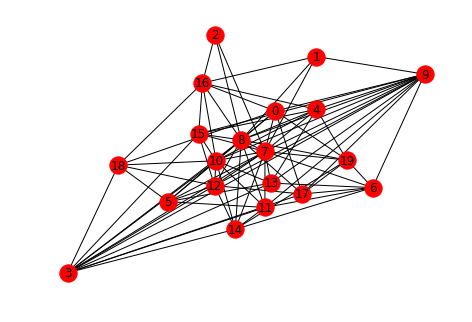

In [5]:

G=nx.powerlaw_cluster_graph(20, 7, 0.3, seed=654) # https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.generators.random_graphs.powerlaw_cluster_graph.html#networkx.generators.random_graphs.powerlaw_cluster_graph
G=nx.Graph(G) # to remove parallel edges
G.remove_edges_from(G.selfloop_edges()) # to remove self loops
nx.draw(G, with_labels=True)

In [6]:
# How to use the object G: some examples
for node in G.nodes():
    deg = G.degree(node)
    neighbors = G.neighbors(node)
    print str(node) + " has neighbours " + ",".join(str(n) for n in G.neighbors(node))
    print str(node) + " has degree " + str(G.degree(node))

0 has neighbours 7,8,9,10,16,17,18,19
0 has degree 8
1 has neighbours 8,9,16,7
1 has degree 4
2 has neighbours 8,16,7
2 has degree 3
3 has neighbours 7,8,9,10,11,12,13,14,15,17,18
3 has degree 11
4 has neighbours 7,8,9,10,13,15,16,19
4 has degree 8
5 has neighbours 7,8,10,11,12,13,18
5 has degree 7
6 has neighbours 7,9,11,13,14,17,19
6 has degree 7
7 has neighbours 0,1,2,3,4,5,6,8,9,10,11,12,13,14,15,19
7 has degree 16
8 has neighbours 0,1,2,3,4,5,7,9,10,11,12,14,15,16,17,19
8 has degree 16
9 has neighbours 0,1,3,4,6,7,8,10,11,12,13,15,17
9 has degree 13
10 has neighbours 0,3,4,5,7,8,9,11,12,13,14,15,16,18
10 has degree 14
11 has neighbours 3,5,6,7,8,9,10,14
11 has degree 8
12 has neighbours 3,5,7,8,9,10,14,15,17,18
12 has degree 10
13 has neighbours 3,4,5,6,7,9,10
13 has degree 7
14 has neighbours 3,6,7,8,10,11,12,19
14 has degree 8
15 has neighbours 3,4,7,8,9,10,12,16
15 has degree 8
16 has neighbours 0,1,2,4,8,10,15,18
16 has degree 8
17 has neighbours 0,3,6,8,9,12,19
17 has degree 

In [7]:
T = 1000000

def simple_walk_from(x):
    return random.choice(G.neighbors(x)) # sample uniformly among neighbors of x

def run_chain_starting_from(x_zero):
    visited_nodes = []
    current_node = x_zero
    for i in range(T):
        visited_nodes.append(current_node)
        
        proposal = simple_walk_from(current_node)
        x, y = current_node, proposal
        accept_prob = min(1, float(abs(math.cos(y)) * G.degree(x)) / float(abs(math.cos(x)) * G.degree(y)))
        accept = np.random.binomial(1, accept_prob)
        
        if accept:
            current_node = proposal
        
    return visited_nodes
        
    
from collections import Counter
counts = Counter(run_chain_starting_from(18))

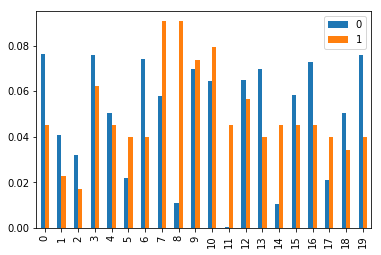

In [8]:


def proportion_of_time_node_was_visited(node):
    return counts[node]/float(T)

def simple_walk_stationary_distribution(node):
    return G.degree(node)/float(2*len(G.edges()))
                                
    
data = dict( (
                node, (
                    proportion_of_time_node_was_visited(node), # first column
                    simple_walk_stationary_distribution(node)) # second column
             )
            for node in G.nodes())
df = pd.DataFrame(data).transpose()
df.plot(kind="bar")
